<a href="https://colab.research.google.com/github/mincfranc/DD_DataScience/blob/main/10_29_24_Homework_Project3_SQL_1_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


#Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database


In [2]:
# Install supressed and updated sqlite3 package to interact with SQLite database within Jupyter nb on Ubuntu system

%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [3]:
# @title sqlite3- help

!sqlite3 --help

Usage: sqlite3 [OPTIONS] FILENAME [SQL]
FILENAME is the name of an SQLite database. A new database is created
if the file does not previously exist.
OPTIONS include:
   -A ARGS...           run ".archive ARGS" and exit
   -append              append the database to the end of the file
   -ascii               set output mode to 'ascii'
   -bail                stop after hitting an error
   -batch               force batch I/O
   -box                 set output mode to 'box'
   -column              set output mode to 'column'
   -cmd COMMAND         run "COMMAND" before reading stdin
   -csv                 set output mode to 'csv'
   -deserialize         open the database using sqlite3_deserialize()
   -echo                print commands before execution
   -init FILENAME       read/process named file
   -[no]header          turn headers on or off
   -help                show this message
   -html                set output mode to HTML
   -interactive         force interactive I/O
   -j

In [4]:
#Download chinook.zip file by checking if it's present otherwise transfer via curl and display list without extracting.

%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [5]:
#Unzip program to extract files with updated versions

!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [6]:
#Display detailed files/folders in long list format, including hidden data.

#ls: magics shell command to list contents of a directory(folder)
#-l: tells ls to display in long list
#-a: tells ls to show all files including hidden
!ls -la


total 1180
drwxr-xr-x 1 root root   4096 Oct 29 10:54 .
drwxr-xr-x 1 root root   4096 Oct 29 10:53 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Oct 29 10:54 chinook.zip
drwxr-xr-x 4 root root   4096 Oct 25 13:20 .config
drwxr-xr-x 1 root root   4096 Oct 25 13:20 sample_data


In [7]:
# Get a list of the tables in the database

%%script sqlite3 --column --header chinook.db
.tables

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [8]:
# Show the schema for the entire database

%%script sqlite3 --column --header chinook.db
.schema

CREATE TABLE IF NOT EXISTS "albums"
(
    [AlbumId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Title] NVARCHAR(160)  NOT NULL,
    [ArtistId] INTEGER  NOT NULL,
    FOREIGN KEY ([ArtistId]) REFERENCES "artists" ([ArtistId]) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
);
CREATE TABLE sqlite_sequence(name,seq);
CREATE TABLE IF NOT EXISTS "artists"
(
    [ArtistId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [Name] NVARCHAR(120)
);
CREATE TABLE IF NOT EXISTS "customers"
(
    [CustomerId] INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    [FirstName] NVARCHAR(40)  NOT NULL,
    [LastName] NVARCHAR(20)  NOT NULL,
    [Company] NVARCHAR(80),
    [Address] NVARCHAR(70),
    [City] NVARCHAR(40),
    [State] NVARCHAR(40),
    [Country] NVARCHAR(40),
    [PostalCode] NVARCHAR(10),
    [Phone] NVARCHAR(24),
    [Fax] NVARCHAR(24),
    [Email] NVARCHAR(60)  NOT NULL,
    [SupportRepId] INTEGER,
    FOREIGN KEY ([SupportRepId]) REFERENCES "employees" ([EmployeeId]) 
		ON DELETE NO ACTION ON 

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


In [78]:
%%script sqlite3 --column --header chinook.db
SELECT SUM(T3.num_cols) FROM ( SELECT T1.name, ( SELECT COUNT(*) FROM pragma_table_info(T1.name) ) AS num_cols FROM sqlite_master AS T1 WHERE T1.type = 'table' ) AS T3

SUM(T3.num_cols)
----------------
69              


In [79]:
%%script sqlite3 --column --header chinook.db
SELECT COUNT(DISTINCT country)
FROM customers;

COUNT(DISTINCT country)
-----------------------
24                     


In [9]:
#from 10_16_24_2d-sqlite3-Selects,  10_17_24_a 2f-sqlite3-chinook, 10_17_24_ x_X_2f-sqlite3-chinooK lectures

### Basic Queries


#### SELECT (with * and with column names)


In [10]:
# RETURN all employee info
#%%script sqlite3 --column --header chinook.db: Command used in jupyter notebooks to run external scripts. Tells nb to execute code using sqlite3 command-line tool
# %%script: Jupyter magic command
# sqlite3: specifies command-line tool to interact with SQLITE databases
# --column: tells sql3 to format output in columns
# --header: tells sql3 to include column headers in output
# chinook.db: name of sql db file to be queried

 # SELECT: keyword specifies table 'employees' from which to retrieve
 # FROM: keyword retrieves data from ALL columns in db

In [11]:
# RETURN all employee info

%%script sqlite3 --column --header chinook.db
select *
from employees
;

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [12]:
# RETURN all customer info

%%script sqlite3 --column --header chinook.db
select *
from customers

CustomerId  FirstName  LastName      Company                                           Address                                   City                 State   Country         PostalCode  Phone                Fax                 Email                          SupportRepId
----------  ---------  ------------  ------------------------------------------------  ----------------------------------------  -------------------  ------  --------------  ----------  -------------------  ------------------  -----------------------------  ------------
1           Luís       Gonçalves     Embraer - Empresa Brasileira de Aeronáutica S.A.  Av. Brigadeiro Faria Lima, 2170           São José dos Campos  SP      Brazil          12227-000   +55 (12) 3923-5555   +55 (12) 3923-5566  luisg@embraer.com.br           3           
2           Leonie     Köhler                                                          Theodor-Heuss-Straße 34                   Stuttgart                    Germany         70174       +

In [13]:
# RETURN all employee info from only the specific column names 'EmployeeID..'

%%script sqlite3 --column --header chinook.db

select EmployeeId, LastName, FirstName, Title, ReportsTo
from employees
;

EmployeeId  LastName  FirstName  Title                ReportsTo
----------  --------  ---------  -------------------  ---------
1           Adams     Andrew     General Manager               
2           Edwards   Nancy      Sales Manager        1        
3           Peacock   Jane       Sales Support Agent  2        
4           Park      Margaret   Sales Support Agent  2        
5           Johnson   Steve      Sales Support Agent  2        
6           Mitchell  Michael    IT Manager           1        
7           King      Robert     IT Staff             6        
8           Callahan  Laura      IT Staff             6        


In [14]:
# RETURN all customer info from only the specific column names 'CustomerID...'

%%script sqlite3 --column --header chinook.db
select CustomerID, FirstName, LastName, SupportRepID
from customers
;

CustomerId  FirstName  LastName      SupportRepId
----------  ---------  ------------  ------------
1           Luís       Gonçalves     3           
2           Leonie     Köhler        5           
3           François   Tremblay      3           
4           Bjørn      Hansen        4           
5           František  Wichterlová   4           
6           Helena     Holý          5           
7           Astrid     Gruber        5           
8           Daan       Peeters       4           
9           Kara       Nielsen       4           
10          Eduardo    Martins       4           
11          Alexandre  Rocha         5           
12          Roberto    Almeida       3           
13          Fernanda   Ramos         4           
14          Mark       Philips       5           
15          Jennifer   Peterson      3           
16          Frank      Harris        4           
17          Jack       Smith         5           
18          Michelle   Brooks        3           


#### WHERE


In [15]:
#RETURN list of all customers who have SupportRep 4

%%script sqlite3 --column --header chinook.db
SELECT * FROM customers
WHERE SupportRepID = '4'
;

CustomerId  FirstName  LastName     Company           Address                                   City           State  Country         PostalCode  Phone                Fax                 Email                        SupportRepId
----------  ---------  -----------  ----------------  ----------------------------------------  -------------  -----  --------------  ----------  -------------------  ------------------  ---------------------------  ------------
4           Bjørn      Hansen                         Ullevålsveien 14                          Oslo                  Norway          0171        +47 22 44 22 22                          bjorn.hansen@yahoo.no        4           
5           František  Wichterlová  JetBrains s.r.o.  Klanova 9/506                             Prague                Czech Republic  14700       +420 2 4172 5555     +420 2 4172 5555    frantisekw@jetbrains.com     4           
8           Daan       Peeters                        Grétrystraat 63               

#### AND


In [16]:
#RETURN list of all customers from Denmark and have SupportRep 4

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE country = 'Denmark'
AND supportrepid= '4'
;

CustomerId  FirstName  LastName  Company  Address              City        State  Country  PostalCode  Phone           Fax  Email                  SupportRepId
----------  ---------  --------  -------  -------------------  ----------  -----  -------  ----------  --------------  ---  ---------------------  ------------
9           Kara       Nielsen            Sønder Boulevard 51  Copenhagen         Denmark  1720        +453 3331 9991       kara.nielsen@jubii.dk  4           


#### OR


In [17]:
#RETURN all columns from customers table for records where city is either 'Brussels' or 'Buenos Aires'.
%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE city = 'Brussels'
OR city= 'Buenos Aires'
;

CustomerId  FirstName  LastName   Company  Address             City          State  Country    PostalCode  Phone                Fax  Email                     SupportRepId
----------  ---------  ---------  -------  ------------------  ------------  -----  ---------  ----------  -------------------  ---  ------------------------  ------------
8           Daan       Peeters             Grétrystraat 63     Brussels             Belgium    1000        +32 02 219 03 03          daan_peeters@apple.be     4           
56          Diego      Gutiérrez           307 Macacha Güemes  Buenos Aires         Argentina  1106        +54 (0)11 4311 4333       diego.gutierrez@yahoo.ar  4           


#### LIKE (with % or _ wildcard)


In [18]:
#RETURN all info from customers table whose last names end with 'a'

%%script sqlite3 --column --header chinook.db
SELECT *
FROM customers
WHERE lastname LIKE '%a'
;

CustomerId  FirstName  LastName    Company               Address             City            State  Country  PostalCode  Phone               Fax                 Email                          SupportRepId
----------  ---------  ----------  --------------------  ------------------  --------------  -----  -------  ----------  ------------------  ------------------  -----------------------------  ------------
11          Alexandre  Rocha       Banco do Brasil S.A.  Av. Paulista, 2022  São Paulo       SP     Brazil   01310-200   +55 (11) 3055-3278  +55 (11) 3055-8131  alero@uol.com.br               5           
12          Roberto    Almeida     Riotur                Praça Pio X, 119    Rio de Janeiro  RJ     Brazil   20040-020   +55 (21) 2271-7000  +55 (21) 2271-7070  roberto.almeida@riotur.gov.br  3           
59          Puja       Srivastava                        3,Raj Bhavan Road   Bangalore              India    560001      +91 080 22289999                        puja_srivastava@yah

#### BETWEEN


In [19]:
#RETURN all columns from the invoices table for records with an invoicedate between January 1, 2013, and April 30, 2013

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
WHERE invoicedate
BETWEEN '2013-01-01' AND '2013-04-30'
;

InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity     BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  --------------  ------------  --------------  -----------------  -----
333        30          2013-01-02 00:00:00  230 Elgin Street                          Ottawa          ON            Canada          K2P 1L7            8.91 
334        39          2013-01-07 00:00:00  4, Rue Milton                             Paris                         France          75009              13.86
335        53          2013-01-15 00:00:00  113 Lupus St                              London                        United Kingdom  SW1V 3EN           0.99 
336        54          2013-01-28 00:00:00  110 Raeburn Pl                            Edinburgh                     United Kingdom  EH4 1HH            1.98 
337        56          2013-01-28 00:00:00  307 Macacha Gü

#### LIMIT



In [20]:
#Retrieve all information for the first five genres

%%script sqlite3 --column --header chinook.db
SELECT *
FROM genres
LIMIT 5
;

GenreId  Name              
-------  ------------------
1        Rock              
2        Jazz              
3        Metal             
4        Alternative & Punk
5        Rock And Roll     


### Sorting and Grouping


#### ORDER BY


In [21]:
#RETURN all data from invoices table sorted by values in `total` column in ascending order

%%script sqlite3 --column --header chinook.db
SELECT *
FROM invoices
ORDER BY total
;

InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----
6          37          2009-01-19 00:00:00  Berger Straße 10                          Frankfurt                          Germany         60316              0.99 
13         16          2009-02-19 00:00:00  1600 Amphitheatre Parkway                 Mountain View        CA            USA             94043-1351         0.99 
20         54          2009-03-22 00:00:00  110 Raeburn Pl                            Edinburgh                          United Kingdom  EH4 1HH            0.99 
27         33          2009-04-22 00:00:00  5112 48 Street                            Yellowknife          NT            Canada          X1A 1N6            0.99 
34         12          2009-

#### DISTINCT


In [22]:
#RETURN Unique Composer Names without duplicates

%%script sqlite3 --column --header chinook.db
select distinct Composer
from tracks
Limit 10
;

Composer                                                              
----------------------------------------------------------------------
Angus Young, Malcolm Young, Brian Johnson                             
                                                                      
F. Baltes, S. Kaufman, U. Dirkscneider & W. Hoffman                   
F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. Dirkscneider & W. Hoffman
Deaffy & R.A. Smith-Diesel                                            
AC/DC                                                                 
Steven Tyler, Joe Perry, Jack Blades, Tommy Shaw                      
Steven Tyler, Joe Perry                                               
Steven Tyler, Joe Perry, Jim Vallance, Holly Knight                   
Steven Tyler, Joe Perry, Desmond Child                                


#### GROUP BY



In [23]:
#RETURN Aggregate Sales by Customer with Billing Country

%%script sqlite3 --column --header chinook.db
select customerid, SUM(total) AS total_sales, billingcountry
from invoices
GROUP BY customerid
;

CustomerId  total_sales  BillingCountry
----------  -----------  --------------
1           39.62        Brazil        
2           37.62        Germany       
3           39.62        Canada        
4           39.62        Norway        
5           40.62        Czech Republic
6           49.62        Czech Republic
7           42.62        Austria       
8           37.62        Belgium       
9           37.62        Denmark       
10          37.62        Brazil        
11          37.62        Brazil        
12          37.62        Brazil        
13          37.62        Brazil        
14          37.62        Canada        
15          38.62        Canada        
16          37.62        USA           
17          39.62        USA           
18          37.62        USA           
19          38.62        USA           
20          39.62        USA           
21          37.62        USA           
22          39.62        USA           
23          37.62        USA           


In [24]:
#RETURN total number of customers grouped by country from the customers table, displaying each country alongside its corresponding customer count

%%script sqlite3 --column --header chinook.db
SELECT Country, COUNT(*) AS CustomerCount
FROM Customers
GROUP BY Country
;

Country         CustomerCount
--------------  -------------
Argentina       1            
Australia       1            
Austria         1            
Belgium         1            
Brazil          5            
Canada          8            
Chile           1            
Czech Republic  2            
Denmark         1            
Finland         1            
France          5            
Germany         4            
Hungary         1            
India           2            
Ireland         1            
Italy           1            
Netherlands     1            
Norway          1            
Poland          1            
Portugal        2            
Spain           1            
Sweden          1            
USA             13           
United Kingdom  3            


### Aggregates


#### MAX


In [25]:
#RETURN most recent invoice date from the invoices table

%%script sqlite3 --column --header chinook.db
SELECT max(invoicedate)
FROM invoices
;

max(invoicedate)   
-------------------
2013-12-22 00:00:00


#### MIN


In [26]:
#RETURN earliest invoice date from the invoices table

%%script sqlite3 --column --header chinook.db
SELECT min(invoicedate)
FROM invoices
;

min(invoicedate)   
-------------------
2009-01-01 00:00:00


#### SUM


In [27]:
#RETURN calculated total sum of all invoice amounts from invoices table

%%script sqlite3 --column --header chinook.db
SELECT sum(total)
FROM invoices
;

sum(total)
----------
2328.6    


#### AVG


In [28]:
#RETURN calculated average invoice amount from invoices table

%%script sqlite3 --column --header chinook.db
SELECT AVG(total) FROM invoices
;

AVG(total)      
----------------
5.65194174757282


In [29]:
#RETURN first 10 records of invoice IDs and their corresponding invoice dates from invoices table to verify that InvoiceDate is formatted as YYYY-MM-DD

%%script sqlite3 --column --header chinook.db
SELECT
    InvoiceId,
    InvoiceDate
FROM
    invoices
LIMIT 10
;

InvoiceId  InvoiceDate        
---------  -------------------
1          2009-01-01 00:00:00
2          2009-01-02 00:00:00
3          2009-01-03 00:00:00
4          2009-01-06 00:00:00
5          2009-01-11 00:00:00
6          2009-01-19 00:00:00
7          2009-02-01 00:00:00
8          2009-02-01 00:00:00
9          2009-02-02 00:00:00
10         2009-02-03 00:00:00


## AVERAGE
*   Business need: calculate the average number of days between invoices for each customer to enhance cash flow management, optimize marketing strategies, and improve overall customer engagement and retention.

*  Question: How do I calculate the average number of days between invoices for each customer?

      - Use WITH clause to create CTE from invoices table, columns CustomerID & alias DaysBetw to compute
        difference in days bt consecutive invoices
      - Query CTE by selecting column CustomerID and averaging alias column
      - Join CTE with customer table alias on CustomerID
      - Filter out nulls in DaysBetw
      - Group by CustomerID

In [30]:
# RETURN Calculated average days between invoices for each customer

%%script sqlite3 --column --header chinook.db

WITH InvoiceDiff AS (                   --CTE "InvoiceDiff" from invoices table
    SELECT                              --col 'CustomerId' & alias 'DaysBetw'
        CustomerId,                     --calculated difference in days
        (julianday(InvoiceDate) - julianday(LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate))) AS DaysBetw
    FROM
        invoices
)

SELECT
    cust.CustomerId,                      --Query CTE "InvoiceDiff" by selecting
    AVG(DaysBetw) AS AvgDaysBetweenInvoices      --CustID & averaging 'DaysBetw'
FROM
    InvoiceDiff                     --Joining it w customers table alias 'cust'
JOIN                                                            --on CustomerId
    customers AS cust ON InvoiceDiff.CustomerId = cust.CustomerId
WHERE
    DaysBetw IS NOT NULL                         --Filtering out null 'DaysBetw'
GROUP BY                                           --and grouping by CustomerId
    cust.CustomerId
;

CustomerId  AvgDaysBetweenInvoices
----------  ----------------------
1           207.5                 
2           214.833333333333      
3           214.833333333333      
4           289.166666666667      
5           207.5                 
6           264.333333333333      
7           214.833333333333      
8           289.166666666667      
9           207.5                 
10          264.333333333333      
11          214.833333333333      
12          266.0                 
13          207.5                 
14          264.333333333333      
15          214.833333333333      
16          266.0                 
17          207.5                 
18          207.5                 
19          214.833333333333      
20          214.833333333333      
21          289.166666666667      
22          207.5                 
23          298.0                 
24          214.833333333333      
25          289.166666666667      
26          207.5                 
27          264.3333

```
** (julianday(InvoiceDate) - julianday(LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate))) AS DaysBetw **

This code snippet calculates the number of days between consecutive invoices for each customer using the following components:

julianday(InvoiceDate): This function converts the InvoiceDate into a Julian day number. The Julian date system is a timekeeping method that
provides a continuous count of days from a fixed starting point. Every day which passes is assigned a unique number, eliminating complications
related to calendar months and years.

LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate): The LAG function retrieves the invoice date of the previous invoice for
the same customer (defined by CustomerId). The OVER clause specifies that this operation is partitioned by CustomerId and ordered by
InvoiceDate, ensuring that the comparison is made with the most recent prior invoice.

(julianday(InvoiceDate) - julianday(LAG(InvoiceDate)...)): This part subtracts the Julian day number of the previous invoice date from
the Julian day number of the current invoice date, resulting in the difference in days between the two invoices.

AS DaysBetw: This aliases the result of the calculation as DaysBetw, which represents the number of days between the current invoice and
 the previous invoice for each customer.

Overall, this expression provides the time interval in days between consecutive invoices, allowing for further analysis of customer
 purchasing behavior.
```

In [31]:
#RETURN calculated mean average of days between invoices across all customers

%%script sqlite3 --column --header chinook.db

WITH InvoiceDiff AS (                   --Determine average days bt consecutive
    SELECT                              --invoices per customer
        CustomerId,
        (julianday(InvoiceDate) - julianday(LAG(InvoiceDate) OVER (PARTITION BY CustomerId ORDER BY InvoiceDate))) AS DaysBetw
    FROM
        invoices
), CustomerAverages AS (
    SELECT
        CustomerId,
        AVG(DaysBetw) AS AvgDaysBetweenInvoices
    FROM
        InvoiceDiff
    WHERE
        DaysBetw IS NOT NULL
    GROUP BY                            --Aggregate averages
        CustomerId
)

SELECT
    AVG(AvgDaysBetweenInvoices) AS MeanDaysBetweenInvoices
FROM
    CustomerAverages
    ;

MeanDaysBetweenInvoices
-----------------------
234.60790960452        


#### COUNT



In [32]:
#RETURN list of countries listed by customers without duplicates

%%script sqlite3 --column --header chinook.db
select count(distinct country)
from customers
;

count(distinct country)
-----------------------
24                     


In [33]:
#RETURN total number of customers

%%script sqlite3 --column --header chinook.db
select count(customerID)
from customers
;

count(customerID)
-----------------
59               


In [34]:
%%script sqlite3 --column --header chinook.db
select count(invoiceID)
from INVOICES
;

count(invoiceID)
----------------
412             


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



##PLOT 1
*   Business need:  analyze the total sales generated by each employee to  enhance sales performance and inform resource allocation.

*   Question: Which employees are generating the highest total sales, and what factors contribute to their success?

*  Bar chart to plot total sales for each employee.


*Answer: Jane Peacock, Margaret Park, & Steve Johnson are the top 3 employees.*

*Will look into factors at another time.*


```
METHOD: find x employee in employees table, find all customers associated with employee x, calculate sum of total from customer invoices
and assign as totalsales. Repeat method for all employees. Sort results so employees with most sales shown first.

#SELECT clause gets employee data from employees table and sums total from invoices table then assigns it to alias variable totalsales

#TO GET employees table connected to invoices, must first connect employees table to customers, then connect THAT to invoices==

#FROM clause starts from employees table which LEFT JOINS employeeID with supportrepID from customers table to link employees to their
assigned customers. Left join includes all employees even without assigned customers.

#LEFT JOIN invoices table with customers table joined previously. This extends join to include invoice data

#GROUP BY clause groups by employees data  first
#ORDER BY clause sorts results in descending order based on totalsales
```

In [35]:
#RETURN list of total sales generated by each employee, calculated as the sum of all invoice total by employee and displayed in descending order of total sales. Employee with highest sales is at top of list

%%script sqlite3 --column --header chinook.db
SELECT
Employees.EmployeeId,
Employees.FirstName,
Employees.LastName,
SUM(invoices.Total) AS TotalSales

FROM Employees
LEFT JOIN customers ON EmployeeId = customers.SupportRepId
LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY Employees.EmployeeId, Employees.FirstName, Employees.LastName
ORDER BY TotalSales DESC
;

EmployeeId  FirstName  LastName  TotalSales      
----------  ---------  --------  ----------------
3           Jane       Peacock   833.040000000001
4           Margaret   Park      775.400000000001
5           Steve      Johnson   720.160000000001
1           Andrew     Adams                     
2           Nancy      Edwards                   
6           Michael    Mitchell                  
7           Robert     King                      
8           Laura      Callahan                  


In [36]:
#Define SQL query which finds out which employee has the highest sales, and load results into a pandas dataframe. Then run graphics on data.

# Join table 'employees' with table 'customers' via employeeID to supportRepID
# Join that output to invoices table via 'customers' customer ID to customerID
# Display sum of total column per employee
# Sort in ascending order

import pandas as pd
import sqlite3

# Connect to database
conn = sqlite3.connect('chinook.db')

# Define SQL query
query = """
SELECT
    Employees.EmployeeId,
    Employees.FirstName,
    Employees.LastName,
    SUM(invoices.Total) AS TotalSales

FROM Employees
LEFT JOIN customers ON EmployeeId = customers.SupportRepId
LEFT JOIN invoices ON customers.CustomerId = invoices.CustomerId
GROUP BY Employees.EmployeeId, Employees.FirstName, Employees.LastName
ORDER BY TotalSales DESC;
"""

# Execute query and store results in a DataFrame
df = pd.read_sql_query(query, conn)

# Close connection
conn.close()

# Now 'df' contains the data as a DataFrame
print(df.head())  # Print the first few rows to verify

   EmployeeId FirstName LastName  TotalSales
0           3      Jane  Peacock      833.04
1           4  Margaret     Park      775.40
2           5     Steve  Johnson      720.16
3           1    Andrew    Adams         NaN
4           2     Nancy  Edwards         NaN


In [37]:
#Same as above but include all 8 employees even with missing values or zero dollars in sales

import pandas as pd
import sqlite3

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Modified SQL query to include all employees and handle NULL sales
query = """
SELECT
    E.EmployeeId,
    E.FirstName,
    E.LastName,
    COALESCE(SUM(I.Total), 0) AS TotalSales  -- Use COALESCE to replace NULL sales with 0

FROM Employees E
LEFT JOIN customers C ON E.EmployeeId = C.SupportRepId
LEFT JOIN invoices I ON C.CustomerId = I.CustomerId
GROUP BY E.EmployeeId, E.FirstName, E.LastName
ORDER BY TotalSales DESC;
"""

# Execute query and store results in a DataFrame
df2 = pd.read_sql_query(query, conn)

# Print the head of the dataframe to verify
print(df2)

# Close the connection - Optional, good practice to add conn.close() after you are done with database operations
conn.close()

   EmployeeId FirstName  LastName  TotalSales
0           3      Jane   Peacock      833.04
1           4  Margaret      Park      775.40
2           5     Steve   Johnson      720.16
3           1    Andrew     Adams        0.00
4           2     Nancy   Edwards        0.00
5           6   Michael  Mitchell        0.00
6           7    Robert      King        0.00
7           8     Laura  Callahan        0.00


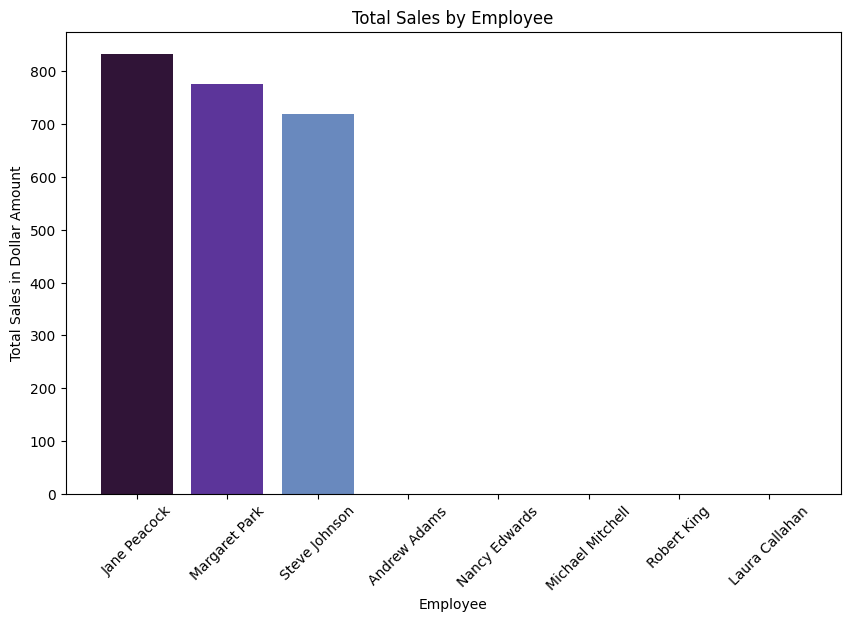

In [38]:
#Same as above and plot in barchart

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import matplotlib.cm as cm
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('chinook.db')

# SQL query (from ipython-input-162-1498ee910209)
query = """
SELECT
    E.EmployeeId,
    E.FirstName,
    E.LastName,
    COALESCE(SUM(I.Total), 0) AS TotalSales  -- Use COALESCE to replace NULL sales with 0

FROM Employees E
LEFT JOIN customers C ON E.EmployeeId = C.SupportRepId
LEFT JOIN invoices I ON C.CustomerId = I.CustomerId
GROUP BY E.EmployeeId, E.FirstName, E.LastName
ORDER BY TotalSales DESC;
"""

# Execute the query and store results in a DataFrame
df2 = pd.read_sql_query(query, conn)

# Save the DataFrame to 'output.csv'
df2.to_csv('output.csv', index=False)  # Add this line to save the data

# Close the connection
conn.close()

# Now you can read it back if needed
df2 = pd.read_csv('output.csv')


# Plot
plt.figure(figsize=(10, 6))

# Create a color palette with a unique color for each employee
colors = plt.cm.twilight_shifted(np.linspace(0, 1, len(df2)))

# Create the bar chart with different colors for each employee
plt.bar(df2['FirstName'] + ' ' + df2['LastName'], df2['TotalSales'], color=colors)
plt.title('Total Sales by Employee')
plt.xlabel('Employee')
plt.ylabel('Total Sales in Dollar Amount')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [39]:
cmaps= plt.colormaps()
print(cmaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

## More Graphics: Distribution of track lengths

* Business need: analyze the distribution of track lengths across different music genres to better understand consumer preferences and trends, to enhance marketing strategies, optimize playlist curation, and guide artist development for increased listener engagement and revenue growth.

* Question:  How do I retrieve a list of tracks along with the distribution of track length across different music genres?

* Use box plot to illustrate the distribution, to show median, quartiles, and any outliers in track lengths for each genre.

In [40]:
#RETURN counts of unique genres in genres table providing insight into the diversity of music genres available

%%script sqlite3 --column --header chinook.db
select count(distinct genreid)
from genres
;

count(distinct genreid)
-----------------------
25                     


In [41]:
#RETURN names of music genres along with corresponding track lengths in seconds by joining the genres table and the tracks table based on the genre ID

%%script sqlite3 --column --header chinook.db

-- Get the distribution of track lengths by genre
SELECT g.Name AS genre_name, t.Milliseconds / 1000 AS track_length_seconds
FROM genres AS g
JOIN tracks AS t ON g.GenreId = t.GenreId
;

genre_name          track_length_seconds
------------------  --------------------
Rock                343                 
Rock                342                 
Rock                230                 
Rock                252                 
Rock                375                 
Rock                205                 
Rock                233                 
Rock                210                 
Rock                203                 
Rock                263                 
Rock                199                 
Rock                263                 
Rock                205                 
Rock                270                 
Rock                331                 
Rock                215                 
Rock                366                 
Rock                267                 
Rock                325                 
Rock                369                 
Rock                254                 
Rock                323                 
Rock            

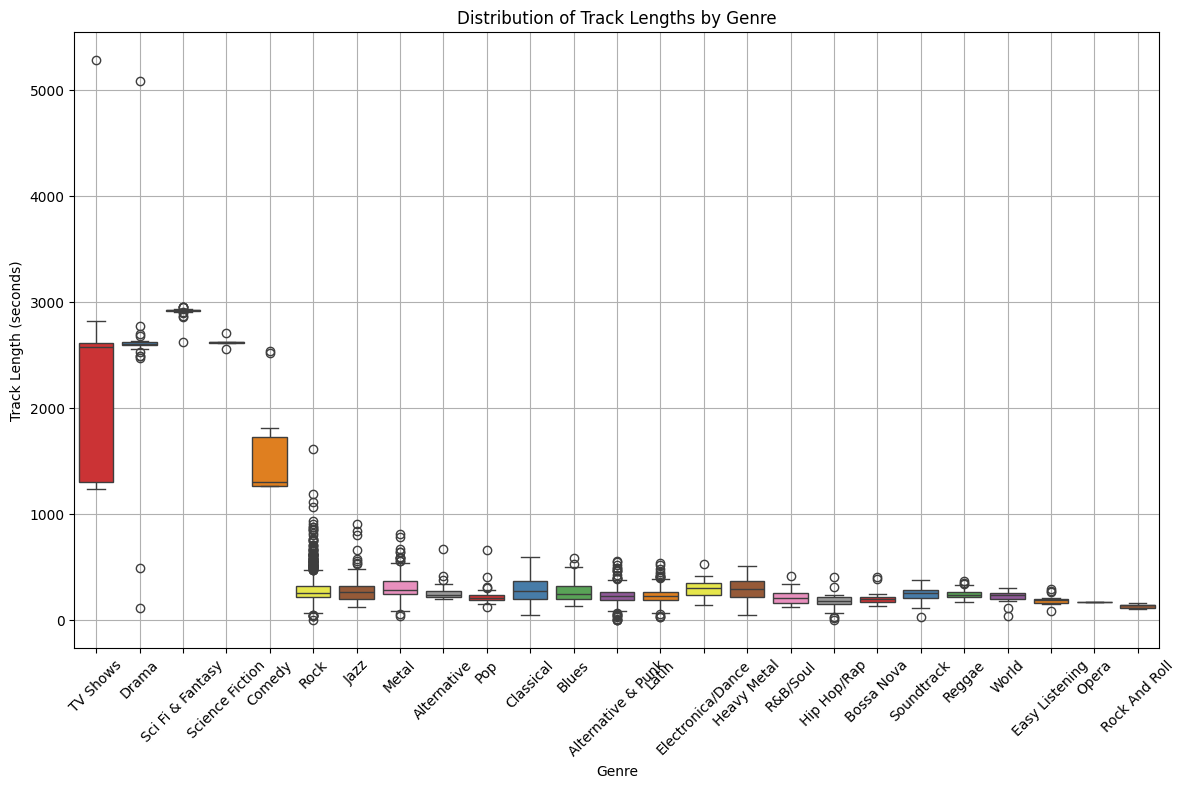

In [42]:

#Python code to execute query and create box plot


# Connect to database
conn = sqlite3.connect('chinook.db')

# SQL query to get track lengths by genre
query = """
SELECT g.Name AS genre_name, t.Milliseconds / 1000 AS track_length_seconds
FROM genres AS g
JOIN tracks AS t ON g.GenreId = t.GenreId
ORDER BY t.Milliseconds DESC
;
"""

# Execute query and store results in DataFrame called df_track_lengths
df_track_lengths = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create box plot
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='genre_name',
    y='track_length_seconds',
    hue= 'genre_name',
    data=df_track_lengths, palette='Set1')
plt.xlabel('Genre')
plt.ylabel('Track Length (seconds)')
plt.title('Distribution of Track Lengths by Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [43]:
#Return min and max track lengths for each genre in seconds
%%script sqlite3 --column --header chinook.db
SELECT
    G.Name AS GenreName,
    MAX(T.Milliseconds/1000) AS MaxTrackLength,
    MIN(T.Milliseconds/1000) AS MinTrackLength
FROM genres AS G
JOIN tracks AS T ON G.GenreId = T.GenreId
GROUP BY G.Name
ORDER BY MaxTrackLength DESC
;

GenreName           MaxTrackLength  MinTrackLength
------------------  --------------  --------------
TV Shows            5286            1237          
Drama               5088            112           
Sci Fi & Fantasy    2960            2622          
Science Fiction     2713            2563          
Comedy              2541            1268          
Rock                1612            1             
Jazz                907             126           
Metal               816             41            
Alternative         672             204           
Pop                 663             129           
Classical           596             51            
Blues               589             135           
Alternative & Punk  558             4             
Latin               543             33            
Electronica/Dance   529             143           
Heavy Metal         516             48            
R&B/Soul            418             127           
Hip Hop/Rap         410        

###Box Plot shows various outliers.

Drop outliers to balance distribution

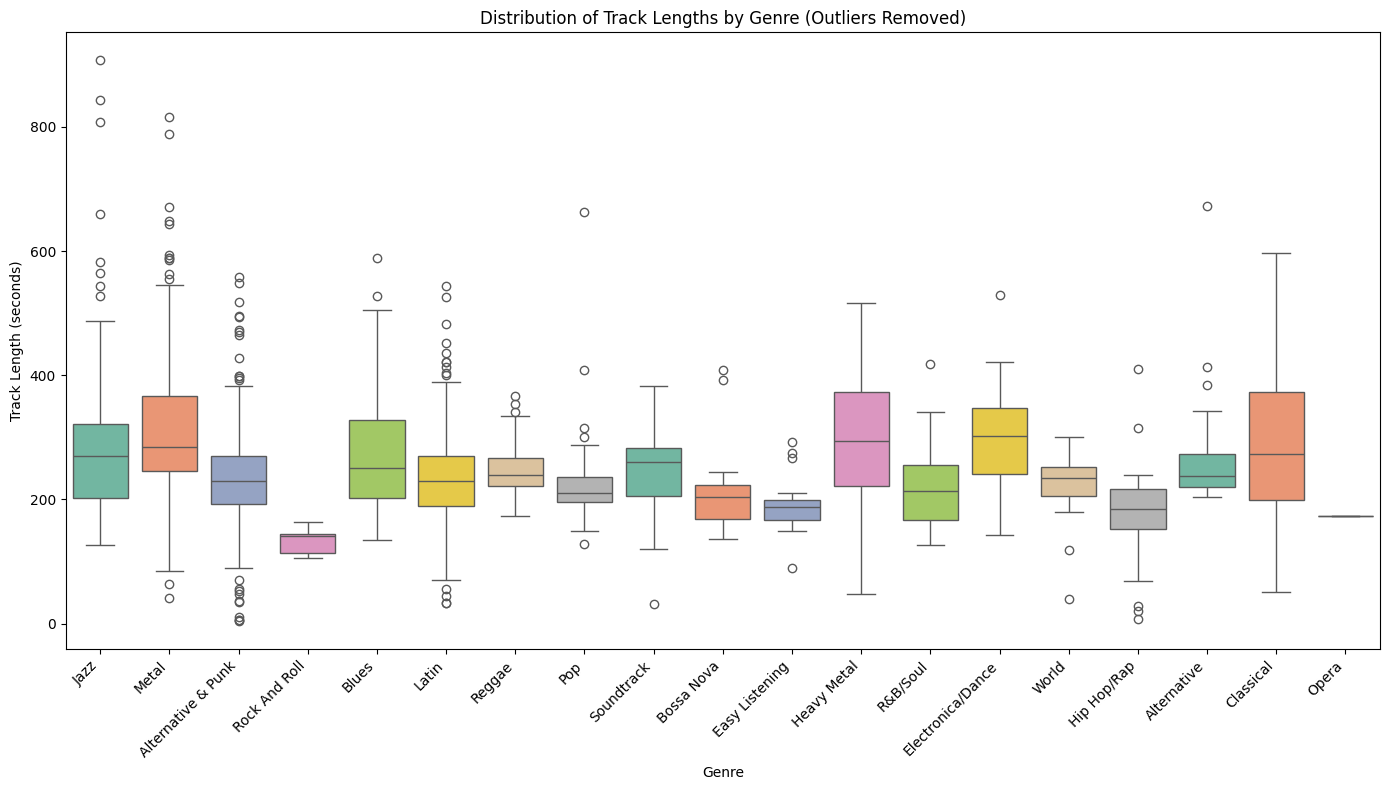

In [44]:
#Remove 7 genres with highest max track lengths

# Connect to the database (use dummy_chinook.db if you created one)
conn = sqlite3.connect('chinook.db')

# SQL query to get track lengths for the remaining genres
query = """
SELECT g.Name AS genre_name, t.Milliseconds / 1000 AS track_length_seconds
FROM genres AS g
JOIN tracks AS t ON g.GenreId = t.GenreId
WHERE g.Name NOT IN ('TV Shows', 'Drama', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy', 'Rock');
"""

# Execute the query and store results in a DataFrame
df_filtered_track_lengths = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot using seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(
    x='genre_name',
    y='track_length_seconds',
    data=df_filtered_track_lengths,
    hue= 'genre_name',
    palette='Set2'
    )
plt.xlabel('Genre')
plt.ylabel('Track Length (seconds)')
plt.title('Distribution of Track Lengths by Genre (Outliers Removed)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [45]:
#Find avg track length in seconds for each genre
%%script sqlite3 --column --header chinook.db
SELECT g.Name AS genre_name, AVG(t.Milliseconds) / 1000 AS avg_length_seconds
FROM genres AS g
JOIN tracks AS t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY avg_length_seconds DESC;

genre_name          avg_length_seconds
------------------  ------------------
Sci Fi & Fantasy    2911.78303846154  
Science Fiction     2625.54907692308  
Drama               2575.28378125     
TV Shows            2145.04102150538  
Comedy              1585.26370588235  
Metal               309.749443850267  
Electronica/Dance   302.9858          
Heavy Metal         297.452928571429  
Classical           293.867567567568  
Jazz                291.755376923077  
Rock                283.910043176561  
Blues               270.359777777778  
Alternative         264.058525        
Reggae              247.17775862069   
Soundtrack          244.37088372093   
Alternative & Punk  234.35384939759   
Latin               232.859262521589  
Pop                 229.034104166667  
World               224.923821428571  
R&B/Soul            220.066852459016  
Bossa Nova          219.59            
Easy Listening      189.164208333333  
Hip Hop/Rap         178.176285714286  
Opera               174.8

In [46]:
# Group data by genre and get descriptive statistics
genre_stats = df_track_lengths.groupby('genre_name')['track_length_seconds'].describe().sort_values(by=['max'])

# Display the table
print(genre_stats)

                     count         mean         std     min      25%     50%  \
genre_name                                                                     
Rock And Roll         12.0   134.166667   20.484288   106.0   113.75   140.5   
Opera                  1.0   174.000000         NaN   174.0   174.00   174.0   
Easy Listening        24.0   188.625000   42.901112    89.0   167.00   187.5   
World                 28.0   224.392857   53.192411    39.0   205.25   234.0   
Reggae                58.0   246.724138   42.401503   173.0   221.00   239.0   
Soundtrack            43.0   243.860465   62.087719    32.0   205.50   260.0   
Bossa Nova            15.0   219.000000   79.149948   137.0   169.00   204.0   
Hip Hop/Rap           35.0   177.714286   77.398348     7.0   153.00   185.0   
R&B/Soul              61.0   219.557377   64.224742   127.0   167.00   213.0   
Heavy Metal           28.0   297.035714  114.455064    48.0   221.75   294.0   
Electronica/Dance     30.0   302.500000 

### Explore media type for the 5 outlier genres

All the same as others genres

In [47]:
#RETURN names of specified genres concatenated with distinct media types associated with each genre
#Joining the genres, tracks, and media_types tables, grouping the results by genre name and ordering them alphabetically

%%script sqlite3 --column --header chinook.db
SELECT
    G.Name AS GenreName,
    GROUP_CONCAT(DISTINCT M.Name) AS MediaTypes
FROM genres AS G
JOIN tracks AS T ON G.GenreId = T.GenreId
JOIN media_types AS M ON T.MediaTypeId = M.MediaTypeId
WHERE
    G.Name IN ('Sci Fi & Fantasy', 'Science Fiction', 'Drama', 'TV Shows', 'Comedy')
GROUP BY G.Name
ORDER BY G.Name
;

GenreName         MediaTypes                 
----------------  ---------------------------
Comedy            Protected MPEG-4 video file
Drama             Protected MPEG-4 video file
Sci Fi & Fantasy  Protected MPEG-4 video file
Science Fiction   Protected MPEG-4 video file
TV Shows          Protected MPEG-4 video file


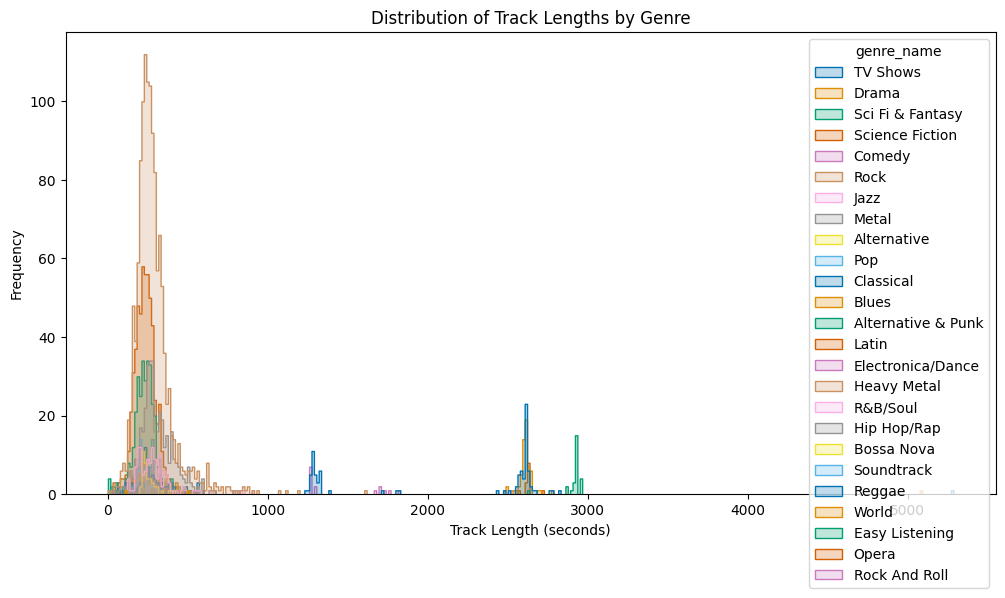

In [48]:
# Create the histogram using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.histplot(data=df_track_lengths, x='track_length_seconds', hue='genre_name', element='step', palette='colorblind')
plt.title('Distribution of Track Lengths by Genre')
plt.xlabel('Track Length (seconds)')
plt.ylabel('Frequency')
plt.show()


*   So overall avg of track length in seconds across 25 genres is 393 seconds
*  5 genres avg between 1585 and 2911 seconds
    * Sci Fi & Fantasy   2911       
    * Science Fiction     2625         
    * Drama               2575            
    * TV Shows            2145         
    * Comedy              1585
    

remove these via CTE and plot avg track length in seconds for remaining 20 genres

In [49]:
%%script sqlite3 --column --header chinook.db
DELETE FROM genres
WHERE Name IN ('TV Shows', 'Drama', 'Sci Fi & Fantasy', 'Science Fiction', 'Comedy', 'Rock')



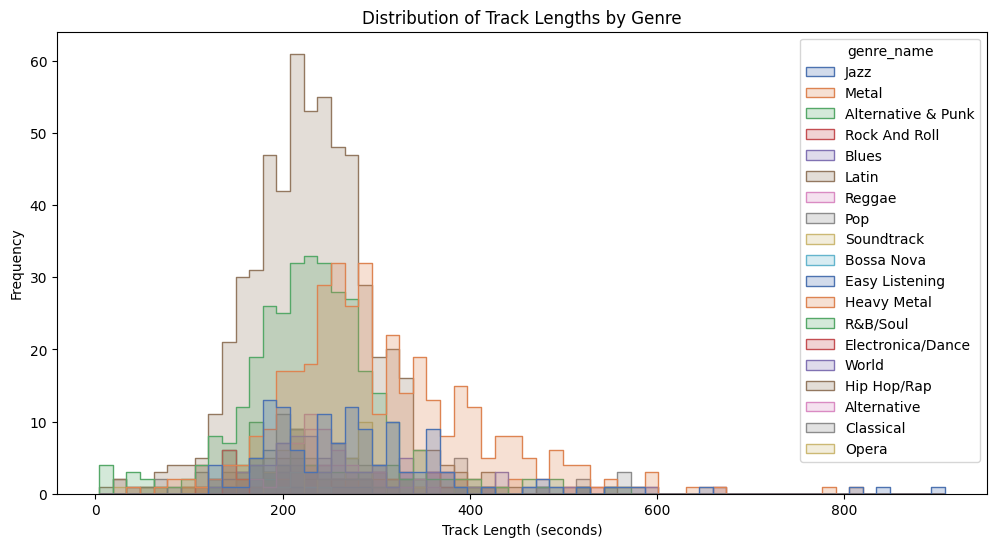

In [50]:

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Read data into a pandas DataFrame
df_track_lengths = pd.read_sql_query("""
    SELECT T.Name AS track_name, T.Milliseconds/1000 AS track_length_seconds, G.Name AS genre_name
    FROM tracks AS T
    JOIN genres AS G ON T.GenreId = G.GenreId
""", conn)

# Close the database connection
conn.close()

# Create the histogram using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.histplot(data=df_track_lengths, x='track_length_seconds', hue='genre_name', element='step', palette='deep')
plt.title('Distribution of Track Lengths by Genre')
plt.xlabel('Track Length (seconds)')
plt.ylabel('Frequency')
plt.show()

In [51]:
#DELETE 4 additional genres beyond 600 seconds max
%%script sqlite3 --column --header chinook.db
DELETE FROM genres
WHERE Name IN ('Pop', 'Alternative', 'Jazz', 'Metal')

In [52]:
%%script sqlite3 --column --header chinook.db
Select name
from genres

Name              
------------------
Alternative & Punk
Rock And Roll     
Blues             
Latin             
Reggae            
Soundtrack        
Bossa Nova        
Easy Listening    
Heavy Metal       
R&B/Soul          
Electronica/Dance 
World             
Hip Hop/Rap       
Classical         
Opera             


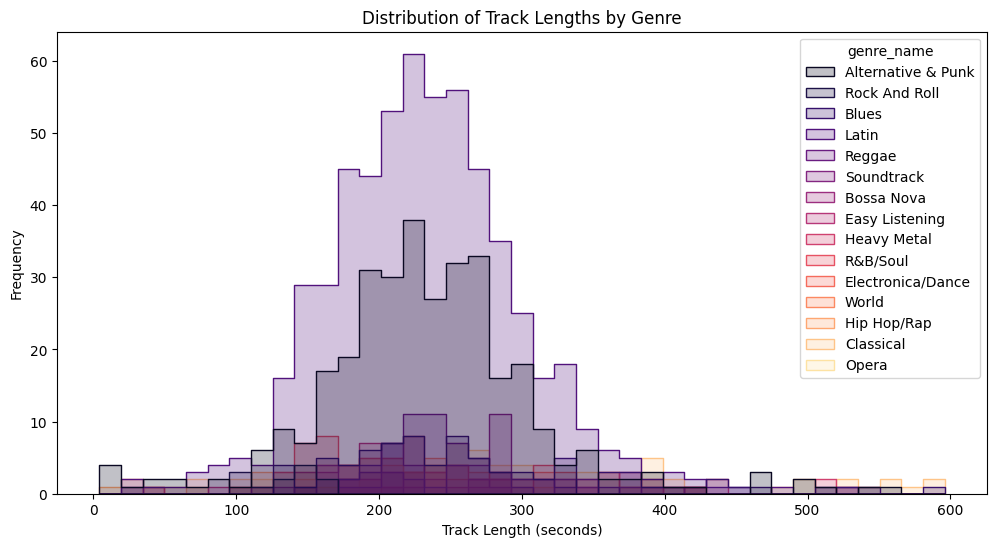

In [53]:

# Connect to the database
conn = sqlite3.connect('chinook.db')

# Read data into a pandas DataFrame
df_track_lengths = pd.read_sql_query("""
    SELECT T.Name AS track_name, T.Milliseconds/1000 AS track_length_seconds, G.Name AS genre_name
    FROM tracks AS T
    JOIN genres AS G ON T.GenreId = G.GenreId
""", conn)

# Close the database connection
conn.close()

# Create the histogram using seaborn
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.histplot(data=df_track_lengths, x='track_length_seconds', hue='genre_name', element='step', palette='magma')
plt.title('Distribution of Track Lengths by Genre')
plt.xlabel('Track Length (seconds)')
plt.ylabel('Frequency')
plt.show()

In [54]:
%%script sqlite3 --column --header chinook.db
--Get average track length
SELECT avg(Milliseconds/1000) FROM tracks;

avg(Milliseconds/1000)
----------------------
393.101912646303      


##  Find correlation between track length (from the tracks table) and track IDs in the invoice_items table.

*   Join tracks table with invoice items on TrackId
*   
*   List item
*   List item




In [55]:
#RETURN a dataset containing track lengths in seconds with respective trackIDs

# Connect to the chinook database
conn = sqlite3.connect('chinook.db')

# Execute query and load results into a DataFrame
query = '''
SELECT
    t.Milliseconds / 1000.0 AS TrackLengthSeconds,
    ii.TrackId
FROM
    invoice_items AS ii
JOIN
    tracks AS t ON ii.TrackId = t.TrackId;
'''

# Create DataFrame
df3 = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()


In [56]:
#Find avg track length in seconds for each genre
%%script sqlite3 --column --header chinook.db
SELECT g.Name AS genre_name, AVG(t.Milliseconds) / 1000 AS avg_length_seconds
FROM genres AS g
JOIN tracks AS t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY avg_length_seconds DESC;

genre_name          avg_length_seconds
------------------  ------------------
Electronica/Dance   302.9858          
Heavy Metal         297.452928571429  
Classical           293.867567567568  
Blues               270.359777777778  
Reggae              247.17775862069   
Soundtrack          244.37088372093   
Alternative & Punk  234.35384939759   
Latin               232.859262521589  
World               224.923821428571  
R&B/Soul            220.066852459016  
Bossa Nova          219.59            
Easy Listening      189.164208333333  
Hip Hop/Rap         178.176285714286  
Opera               174.813           
Rock And Roll       134.6435          


##Correlation
Calculate the correlation between the track lengths (in seconds) of purchased tracks and the corresponding invoice item costs.

In [57]:
import sqlite3
import pandas as pd

# Connect to the chinook database
conn = sqlite3.connect('chinook.db')

# Query to get track lengths and invoice item costs
query = '''
SELECT
    t.TrackId,
    t.Milliseconds / 1000.0 AS TrackLengthSeconds,
    ii.UnitPrice AS InvoiceItemCost
FROM
    tracks AS t
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
JOIN
    invoices AS i ON ii.InvoiceId = i.InvoiceId;
'''

# Load the results into a DataFrame
df_tracks = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Calculate the correlation between Track Length and Invoice Item Cost
correlation = df_tracks['TrackLengthSeconds'].corr(df_tracks['InvoiceItemCost'])
print("Correlation between Track Length (in seconds) and Invoice Item Cost:", correlation)


Correlation between Track Length (in seconds) and Invoice Item Cost: 0.9335328265650046




*   Correlation coefficient of 0.93 indicates a near perfect positive correlation (as one variable increases, the other also increases) -- range is -1 to 1. The closer to +/-1 the stronger the relationship.
*   The diverging color scheme indicates the values in green are positive and perfectly correlated at 1.0, and the values in pink indicate, in this case, also positive correlations below 1.0.
*

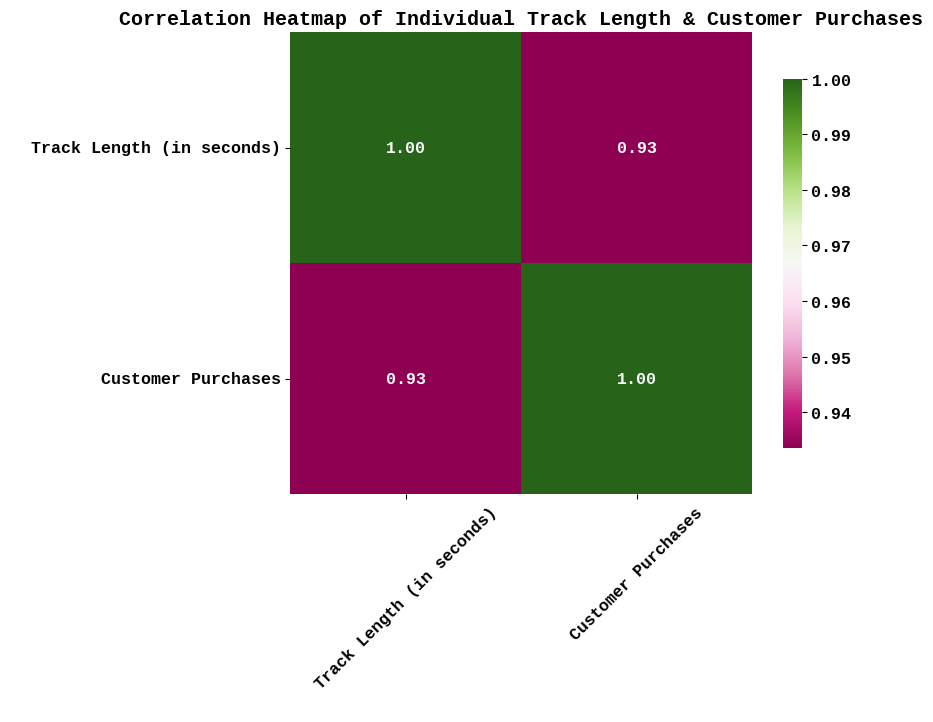

In [58]:
# Connect to the chinook database
conn = sqlite3.connect('chinook.db')

# Query to get track lengths and invoice item costs
query = '''
SELECT
    t.Milliseconds / 1000.0 AS TrackLengthSeconds,
    ii.UnitPrice AS InvoiceItemCost
FROM
    tracks AS t
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
JOIN
    invoices AS i ON ii.InvoiceId = i.InvoiceId
WHERE
    ii.Quantity > 0;  -- Ensure only purchased items are considered
'''

# Load the results into a DataFrame
df_tracks = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Calculate the correlation matrix
correlation_matrix = df_tracks.corr()

# Set font properties to bold with a default font
plt.rc('font', family='Liberation Mono', weight='bold', size=12)  # Using a default sans-serif font

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Personalized titles and labels
plt.title('Correlation Heatmap of Individual Track Length & Customer Purchases',
          fontweight='bold')
plt.xlabel(' ', fontweight='bold')  # X-axis label
plt.ylabel(' ', fontweight='bold')  # Y-axis label

# Customizing tick labels
plt.xticks(ticks=[0.5, 1.5], labels=['Track Length (in seconds)', 'Customer Purchases'], rotation=45)
plt.yticks(ticks=[0.5, 1.5], labels=['Track Length (in seconds)', 'Customer Purchases'], rotation=0)

plt.show()


```
The provided code performs several key tasks related to querying a database, analyzing data, and visualizing results:

### Breakdown of the Code:

1. **SQL Query**:
   - The query retrieves two specific pieces of information:
     - **Track Length**: The length of tracks in seconds, calculated by converting milliseconds (stored in the database) to seconds.
     - **Invoice Item Cost**: The price of each item in the invoice.
   - It joins three tables: `tracks`, `invoice_items`, and `invoices` to associate tracks with their respective purchases.
   - The `WHERE` clause ensures that only records for items that have been purchased (where `Quantity > 0`) are included.

2. **Loading Data**:
   - The results of the SQL query are loaded into a Pandas DataFrame named `df_tracks`, which allows for easy data manipulation and analysis in Python.

3. **Database Connection Management**:
   - After loading the data, the database connection is closed to free up resources.

4. **Correlation Calculation**:
   - The correlation matrix is calculated from the DataFrame. This matrix shows the relationship between track lengths and invoice item costs, helping to identify any statistical correlation.

5. **Visualization Setup**:
   - The font settings for the plots are configured to use 'Liberation Mono' in bold, ensuring a clear presentation.

6. **Heatmap Creation**:
   - A heatmap is generated using Seaborn, visualizing the correlation matrix.
   - The `annot=True` argument displays the correlation coefficients on the heatmap.
   - The color map `coolwarm` is used to represent positive and negative correlations visually.

7. **Personalization**:
   - The heatmap is titled "Correlation Heatmap of Individual Track Length & Customer Purchases."
   - The x-axis and y-axis labels are personalized but left empty for clarity.
   - Custom tick labels are added for better understanding, indicating what each axis represents (track length and customer purchases).

8. **Display**:
   - Finally, `plt.show()` displays the heatmap.

### Summary
This code effectively retrieves and analyzes data on track lengths and invoice item costs, calculates the correlation between them, and visualizes the results in a clear and informative heatmap. The personalized titles and labels enhance readability, making it easier for viewers to interpret the correlations between individual track lengths and customer purchases.


In [59]:
import matplotlib.font_manager

# List all available fonts
available_fonts = sorted(set(f.name for f in matplotlib.font_manager.fontManager.ttflist))
print(available_fonts)


['DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Serif Display', 'Humor Sans', 'Liberation Mono', 'Liberation Sans', 'Liberation Sans Narrow', 'Liberation Serif', 'STIXGeneral', 'STIXNonUnicode', 'STIXSizeFiveSym', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeThreeSym', 'STIXSizeTwoSym', 'cmb10', 'cmex10', 'cmmi10', 'cmr10', 'cmss10', 'cmsy10', 'cmtt10']


### EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


###CTE

In [60]:
#1. CTE
#Create 2 CTEs to output data about employees and customers who are linked in 2 tables.
#first CTE: EmployeesCTE is aliased 'ec', second CTE: CustomersCTE aliased 'cc'
#'ec' consists of 5 columns, 'cc' consists of 4 columns
#Condition for JOINing both CTEs is based on their link from SupportRepId to EmployeeID
#INNER JOIN will display only records/rows where supportrepid matches employeeid

%%script sqlite3 --column --header chinook.db
WITH EmployeesCTE AS (
    SELECT
        EmployeeId, LastName, FirstName, Title, ReportsTo
    FROM employees
),
CustomersCTE AS (
    SELECT
        CustomerId, FirstName, LastName, SupportRepId
    FROM customers
)
SELECT
    ec.EmployeeId, ec.LastName, ec.FirstName, ec.Title, ec.ReportsTo,
    cc.CustomerId, cc.FirstName, cc.LastName
FROM CustomersCTE AS cc
INNER JOIN EmployeesCTE AS ec
ON cc.SupportRepId = ec.EmployeeId
;

EmployeeId  LastName  FirstName  Title                ReportsTo  CustomerId  FirstName  LastName    
----------  --------  ---------  -------------------  ---------  ----------  ---------  ------------
3           Peacock   Jane       Sales Support Agent  2          1           Luís       Gonçalves   
5           Johnson   Steve      Sales Support Agent  2          2           Leonie     Köhler      
3           Peacock   Jane       Sales Support Agent  2          3           François   Tremblay    
4           Park      Margaret   Sales Support Agent  2          4           Bjørn      Hansen      
4           Park      Margaret   Sales Support Agent  2          5           František  Wichterlová 
5           Johnson   Steve      Sales Support Agent  2          6           Helena     Holý        
5           Johnson   Steve      Sales Support Agent  2          7           Astrid     Gruber      
4           Park      Margaret   Sales Support Agent  2          8           Daan       Pee

In [61]:
#2. Query that joins two or more tables

#Business Need: identify trends in customer preferences, allowing for targeted marketing strategies. Do so by analyzing the distribution of tracks by media type.

#Question:  How can I retrieve a list of tracks along with their corresponding media types from db?

%%script sqlite3 --column --header chinook.db
SELECT
    t.Name AS TrackName,
    mt.Name AS MediaType
FROM
    tracks AS t
JOIN
    media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
ORDER BY
    t.Name
LIMIT 20


TrackName                                                   MediaType                  
----------------------------------------------------------  ---------------------------
"40"                                                        MPEG audio file            
"?"                                                         Protected MPEG-4 video file
"Eine Kleine Nachtmusik" Serenade In G, K. 525: I. Allegro  Protected AAC audio file   
#1 Zero                                                     MPEG audio file            
#9 Dream                                                    Protected AAC audio file   
'Round Midnight                                             MPEG audio file            
(Anesthesia) Pulling Teeth                                  MPEG audio file            
(Da Le) Yaleo                                               MPEG audio file            
(I Can't Help) Falling In Love With You                     MPEG audio file            
(Oh) Pretty Woman               

### Create a Predictive Model

In [62]:
#3. Create a predictive model

#Business need: Predict which genres and media types will sell best to plan next album launches.

#Question: Which genres and media types should we focus on for new music releases?

#Model: A Random Forest Regressor is used to predict the total sales of tracks based on genre and media type. The model is trained on historical data from the Chinook database. RFR model does not require one-hot encoding categorical variables like genre and media type.

#Outcome: The model's performance is evaluated using the Mean Squared Error (MSE).

#This is a Supervised Regression problem bc model is trained on labeled dataset (genre, media type) with known target variable (total sales) which is a continuous numerical variable.

#STEP 1: Data extraction- Pull track details, genre, media type, and sales information from table 'tracks', aliased as t. JOIN

%%script sqlite3 --column --header chinook.db

SELECT
t.TrackId,
t.Name AS TrackName,
g.Name AS Genre,
mt.Name AS MediaType,
SUM(ii.Quantity) AS TotalSales

FROM
tracks AS t

JOIN
genres AS g ON t.GenreId = g.GenreId

JOIN
media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
JOIN

invoice_items AS ii ON t.TrackId = ii.TrackId

GROUP BY
t.TrackId, g.Name, mt.Name

ORDER BY
TotalSales DESC

LIMIT 20
;

TrackId  TrackName                 Genre               MediaType        TotalSales
-------  ------------------------  ------------------  ---------------  ----------
171      Bowels Of The Devil       Alternative & Punk  MPEG audio file  2         
175      Voodoo                    Alternative & Punk  MPEG audio file  2         
198      When My Left Eye Jumps    Blues               MPEG audio file  2         
207      Meditação                 Latin               MPEG audio file  2         
211      Bem Devagar               Latin               MPEG audio file  2         
217      Mel                       Latin               MPEG audio file  2         
229      Samba De Orly             Latin               MPEG audio file  2         
234      Morena De Angola          Latin               MPEG audio file  2         
240      Meu Caro Amigo            Latin               MPEG audio file  2         
241      Geni E O Zepelim          Latin               MPEG audio file  2         
252 

In [63]:
conn = sqlite3.connect('chinook.db')

# # Execute the SQL query and load data into a DataFrame
query = """
SELECT
    t.TrackId,
    t.Name AS TrackName,
    g.Name AS Genre,
    mt.Name AS MediaType,
    SUM(ii.Quantity) AS TotalSales
FROM
    tracks AS t
JOIN
    genres AS g ON t.GenreId = g.GenreId
JOIN
    media_types AS mt ON t.MediaTypeId = mt.MediaTypeId
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
GROUP BY
    t.TrackId, g.Name, mt.Name
ORDER BY
    TotalSales DESC
;
"""
df = pd.read_sql_query(query, conn)
conn.close()


In [64]:
# Prepare the data for modeling:

# Encode categorical variables
df = pd.get_dummies(df, columns=['Genre', 'MediaType'], drop_first=True)

# Define features and target
X = df.drop(['TrackId', 'TrackName', 'TotalSales'], axis=1)
y = df['TotalSales']


In [65]:
# Model Creation

# Use a machine learning model to predict total sales

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 0.14


```An MSE of 0.14 suggests Random Forest Regressor model is making fairly accurate predictions of total track sales based on genre and media type. ```

In [66]:
#4. Other fun things
# Select the first 10 entries from joining the Customers and Employees tables

%%script sqlite3 --column --header chinook.db
select *
from customers
join employees
on customers.SupportRepID = employees.EmployeeID
limit 10
;

CustomerId  FirstName  LastName     Company                                           Address                               City                 State  Country         PostalCode  Phone               Fax                 Email                     SupportRepId  EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address           City     State  Country  PostalCode  Phone              Fax                Email                   
----------  ---------  -----------  ------------------------------------------------  ------------------------------------  -------------------  -----  --------------  ----------  ------------------  ------------------  ------------------------  ------------  ----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ----------------  -------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Luís       Gonçalv

In [67]:
#RETURN invoice with highest dollar value

%%script sqlite3 --column --header chinook.db
SELECT customerid, SUM(total) AS total_sales
FROM invoices
GROUP BY customerid
ORDER BY total_sales DESC
LIMIT 1
;

CustomerId  total_sales
----------  -----------
6           49.62      


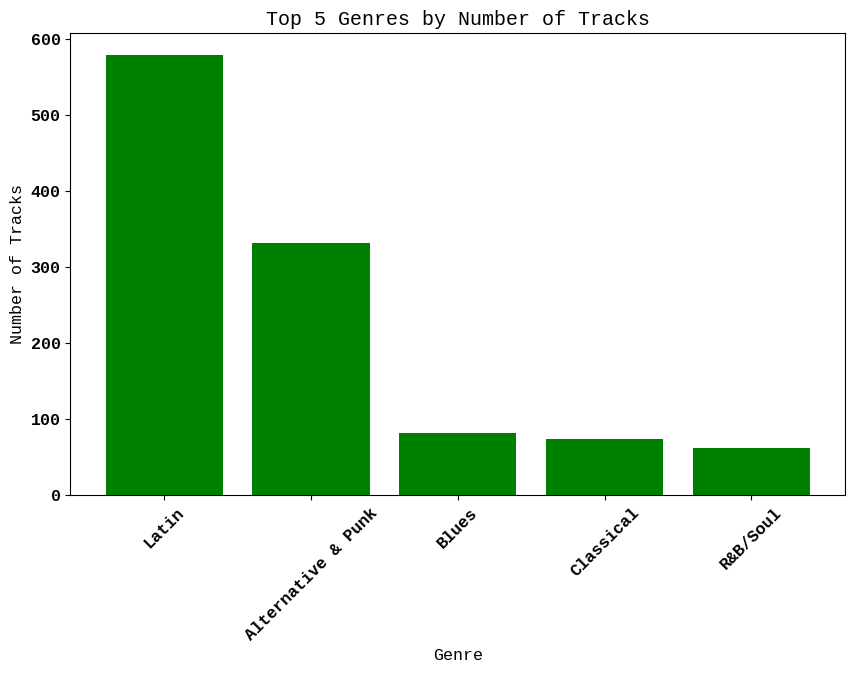

In [68]:
# Generate barchart with top 5 genres with most tracks.

#Method: Combine column Name from table 'genre' with column TrackId from table 'tracks', sorted by track count in descending order and displaying only 5 top genres.  Saved to a sql query to plot using matplotlib

# Connect to the database
conn = sqlite3.connect('chinook.db')
cursor = conn.cursor()

# Execute SQL query
cursor.execute("""
SELECT genres.Name AS GenreName,
       COUNT(tracks.TrackId) AS TrackCount
FROM genres
JOIN tracks ON genres.GenreId = tracks.GenreId
GROUP BY genres.GenreId
ORDER BY TrackCount DESC
LIMIT 5;
""")

# Fetch the results and create a Pandas DataFrame
genre_data = pd.DataFrame(cursor.fetchall(), columns=['GenreName', 'TrackCount'])

# Close the database connection
conn.close()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genre_data['GenreName'], genre_data['TrackCount'], color='green')
plt.title('Top 5 Genres by Number of Tracks')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.show()

In [69]:
import sqlite3
import pandas as pd

# Connect to the chinook database
conn = sqlite3.connect('chinook.db')

# Execute the query and load the results into a DataFrame
query = '''
SELECT
    g.Name AS GenreName,
    SUM(ii.UnitPrice * ii.Quantity) AS TotalSpent
FROM
    genres AS g
JOIN
    tracks AS t ON g.GenreId = t.GenreId
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
JOIN
    invoices AS i ON ii.InvoiceId = i.InvoiceId
WHERE
    ii.Quantity > 0
GROUP BY
    g.Name
ORDER BY
    TotalSpent DESC;
'''

df_genre_spending = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(df_genre_spending)


             GenreName  TotalSpent
0                Latin      382.14
1   Alternative & Punk      241.56
2                Blues       60.39
3             R&B/Soul       40.59
4            Classical       40.59
5               Reggae       29.70
6           Soundtrack       19.80
7          Hip Hop/Rap       16.83
8           Bossa Nova       14.85
9                World       12.87
10         Heavy Metal       11.88
11   Electronica/Dance       11.88
12      Easy Listening        9.90
13       Rock And Roll        5.94


##Bar chart
Purchases are not normally distributed across genres, HOWEVER, the sales are RIGHTEOUSLY skewed as most are disproportionately Latin music sales.

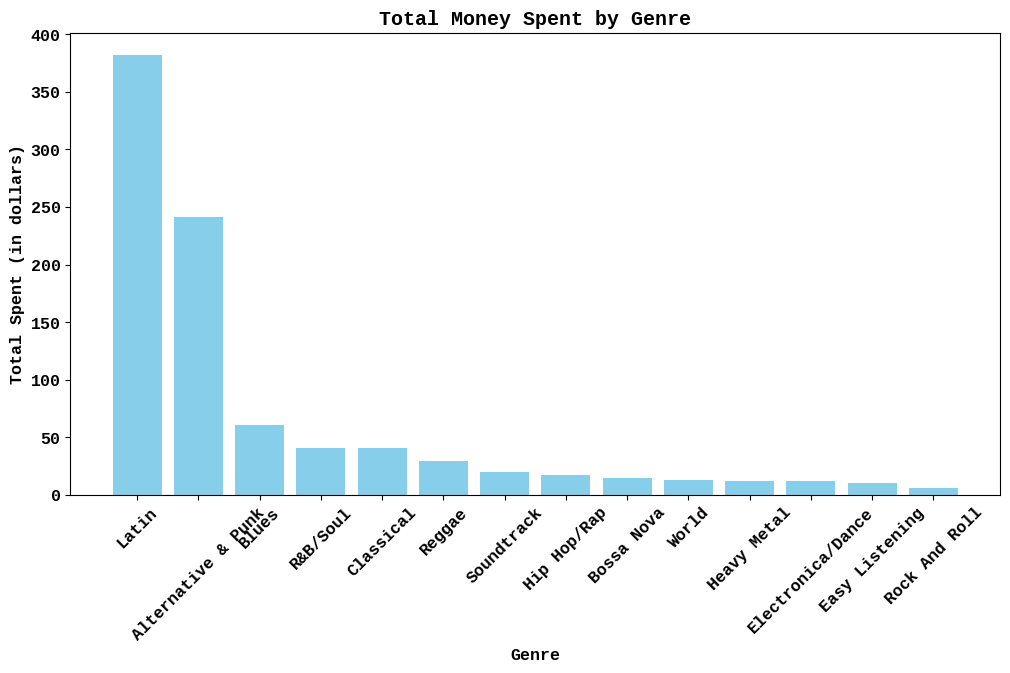

In [70]:
#RETURN bar chart wtih total moneh spent by genre
plt.figure(figsize=(12, 6))
plt.bar(df_genre_spending['GenreName'], df_genre_spending['TotalSpent'], color='skyblue')
plt.title('Total Money Spent by Genre', fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Total Spent (in dollars)', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


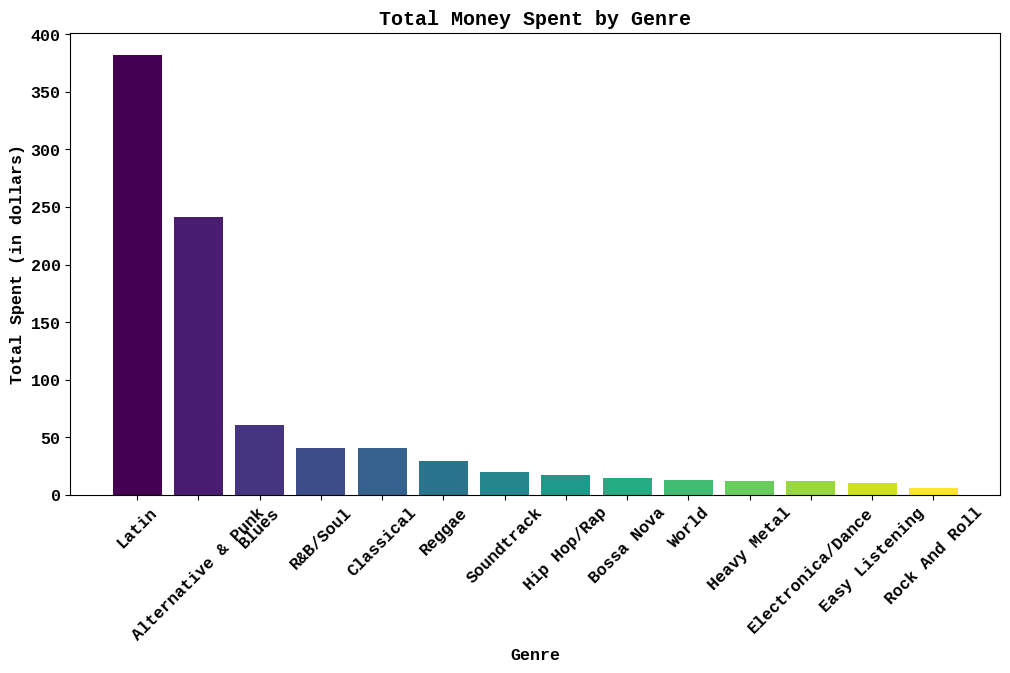

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a list of colors
colors = plt.cm.viridis(np.linspace(0, 1, len(df_genre_spending)))

plt.figure(figsize=(12, 6))
plt.bar(df_genre_spending['GenreName'], df_genre_spending['TotalSpent'], color=colors)
plt.title('Total Money Spent by Genre', fontweight='bold')
plt.xlabel('Genre', fontweight='bold')
plt.ylabel('Total Spent (in dollars)', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [73]:

%%script sqlite3 --column --header chinook.db
SELECT
    g.Name AS GenreName,
    SUM(ii.UnitPrice * ii.Quantity) AS TotalSpent
FROM
    genres AS g
JOIN
    tracks AS t ON g.GenreId = t.GenreId
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
JOIN
    invoices AS i ON ii.InvoiceId = i.InvoiceId
WHERE
    ii.Quantity > 0
GROUP BY
    g.Name
ORDER BY
    TotalSpent DESC;


GenreName           TotalSpent      
------------------  ----------------
Latin               382.140000000002
Alternative & Punk  241.560000000001
Blues               60.39           
R&B/Soul            40.59           
Classical           40.59           
Reggae              29.7            
Soundtrack          19.8            
Hip Hop/Rap         16.83           
Bossa Nova          14.85           
World               12.87           
Heavy Metal         11.88           
Electronica/Dance   11.88           
Easy Listening      9.9             
Rock And Roll       5.94            


###cannot perform ANOVA
* TotalSpent does not follow a normal distribution, violating the assumption of ANOVA.
* Would need to try transforming it using log transformation for example, to achieve normality but nah or I'd have to continue cleaning data and like hard pass my dude
* TotalSpent is the variable/expression I created by calculating the aggregate amount spent on items from a specific genre per invoice.



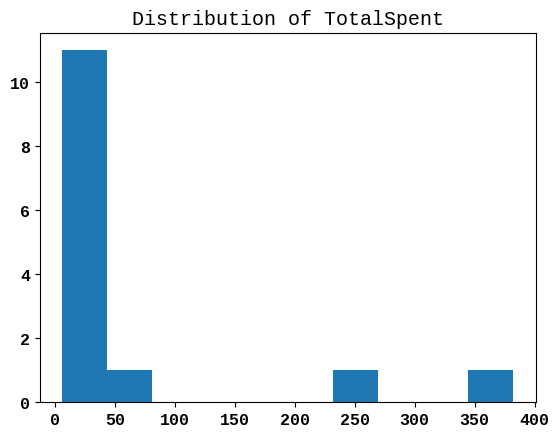

Shapiro-Wilk Test p-value: 1.903791800789406e-05


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: r_matrix performs f_test for using dimensions that are asymptotically non-normal

In [74]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to the database and get the data
conn = sqlite3.connect('chinook.db')
query = '''
SELECT
    g.Name AS GenreName,
    SUM(ii.UnitPrice * ii.Quantity) AS TotalSpent
FROM
    genres AS g
JOIN
    tracks AS t ON g.GenreId = t.GenreId
JOIN
    invoice_items AS ii ON t.TrackId = ii.TrackId
JOIN
    invoices AS i ON ii.InvoiceId = i.InvoiceId
WHERE
    ii.Quantity > 0
GROUP BY
    g.Name
ORDER BY
    TotalSpent DESC;
'''
df_genre_spending = pd.read_sql_query(query, conn)
conn.close()

# --- Diagnostic Checks ---
# 1. Visual Check for Normality:
plt.hist(df_genre_spending['TotalSpent'])
plt.title('Distribution of TotalSpent')
plt.show()

# 2. Statistical Test for Normality (Shapiro-Wilk):
_, p_value = stats.shapiro(df_genre_spending['TotalSpent'])
print(f"Shapiro-Wilk Test p-value: {p_value}")

#1.903 this tells us data is not normally distributed . Again normality assumption is violated.
# If p_value < 0.05, reject normality

#ANOVA need homoscedasticity and the variance of residuals across different groups is heteroscedastic

# --- Potential Solutions ---
# If normality is violated, consider transformation:
# df_genre_spending['TotalSpent_log'] = np.log(df_genre_spending['TotalSpent']) # Log transform

# Perform ANOVA (potentially using the transformed data):
# Replace 'TotalSpent' with 'TotalSpent_log' if transformed
model = ols('TotalSpent ~ C(GenreName)', data=df_genre_spending).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

Steps to Plot SQL Query Results ( %%script sqlite3) in Jupyter Notebook/Colab using Python libraries like Matplotlib and Seaborn:



1. **Set Up Your Environment:**
   - Install necessary libraries (`pandas`, `matplotlib`, `seaborn`).

2. **Upload Your Database File (if using Colab).**

3. **Execute SQL Queries Using `%%script sqlite3`:**
   - Write the SQL query and redirect output to a CSV file.

4. **Read the Output into a Pandas DataFrame.**

5. **Plot the Data Using Matplotlib or Seaborn.**

6. **Repeat for Other Queries:**
   - Write new SQL queries, output to CSV, read into DataFrames, and create plots.

7. **Customize Your Plots.**

8. **Save or Export Your Plots (Optional).**